In [37]:
# # this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# %config InlineBackend.figure_format ='retina'


# OLTraj Example 1: Plot Lagrangian trajectories

## Objective
To extract and plot trajectories (bkw and fwd) for a given date. 

## Input data: 
Any OLTraj file, e.g., ```MERCATOR_025/2008/20081205_oltraj_025_uv_global.nc```


## Code:

Import needed modules

In [13]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from cartopy.util import add_cyclic_point

Read trajectories based on 1/4-deg model

In [14]:
# fn = '../Input/20081205_oltraj_025_uv_global.nc'
# ds = xr.open_dataset(fn)
# ds.assign_coords(lon=(ds.lon + 180)) # convert longitude to 0-360 degs
# ds

In [15]:
# read WOA data
fnwoa = "/fast_scratch/OPERA/Fig1/woa18_all_n00_01.nc"
ds_woa = xr.open_mfdataset(fnwoa, decode_times=False, combine='nested', concat_dim='time')
woa2plot = ds_woa['n_an'].sel(depth=0.0)
woa2plot

<xarray.DataArray 'n_an' (time: 1, lat: 180, lon: 360)>
dask.array<getitem, shape=(1, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    depth    float32 0.0
  * time     (time) float64 8.214e+03
Attributes:
    standard_name:  moles_concentration_of_nitrate_in_sea_water
    long_name:      Objectively analyzed mean fields for moles_concentration_...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram

In [33]:
# read rain data
fn_rain = glob.glob("/fast_scratch/OPERA/Fig1/data/global-precipitation-climatology-project-gpcp-monthly/access/*/*nc")
ds_gpcp = xr.open_mfdataset(fn_rain, combine='nested', concat_dim='time')
ds_gpcp_mean = ds_gpcp['precip'].mean(dim="time", skipna=True)

new_lon = np.linspace(ds_gpcp_mean.longitude[0], ds_gpcp_mean.longitude[-1], 144 * 4)
new_latp = np.linspace(ds_gpcp_mean.latitude[0],ds_gpcp_mean.latitude[-1], 72 * 4)
dsii = ds_gpcp_mean.interp(latitude=new_latp, longitude=new_lon)

dataprec, lonprec = add_cyclic_point(dsii, coord=dsii['longitude'])
dataprec, lonprec = add_cyclic_point(dataprec, coord=lonprec)
dataprec, lonprec = add_cyclic_point(dataprec, coord=lonprec)
dataprec, lonprec = add_cyclic_point(dataprec, coord=lonprec)


Read trajectories based on 1/12-deg model

In [17]:
fn12 = '/data/datasets/Projects/OLTraj/Processed/Lagrangian_traj/MERCATOR_030/2008/20081205_oltraj_030_uv_global.nc'
ds12 = xr.open_dataset(fn12)

# # convert longitude to 0-360 degs
# newlon = ds12['lon'].values
# ineg = np.argwhere(newlon < 0)
# newlon[ineg] = newlon[ineg] + 360.
# ds12.assign_coords(lon=(  newlon  ))



# # convert trajlon to 0-360 degs
# newtrajlon = ds12['trajlon'].values
# newtrajlon[newtrajlon<0] = newtrajlon[newtrajlon<0] +360.

# ds12['trajlon'].where(ds12.lon>-1000, newtrajlon) # this is to replace all values
# ds12



In [32]:
lonprec.shape#, new_lat, dataprec
dataprec.shape
# new_lat.shape

(288, 580)

Here `ds` contains `trajlon` and `trajlat` that are the variables containing the coordinates of the forward and backward trajectories for each grid point.

To visualize the initial positions, let's plot trajlon and trajlat at time-index 29 (i.e., that corresponding to the date in the filename.


**Initialize figure projection add initial points and continents**

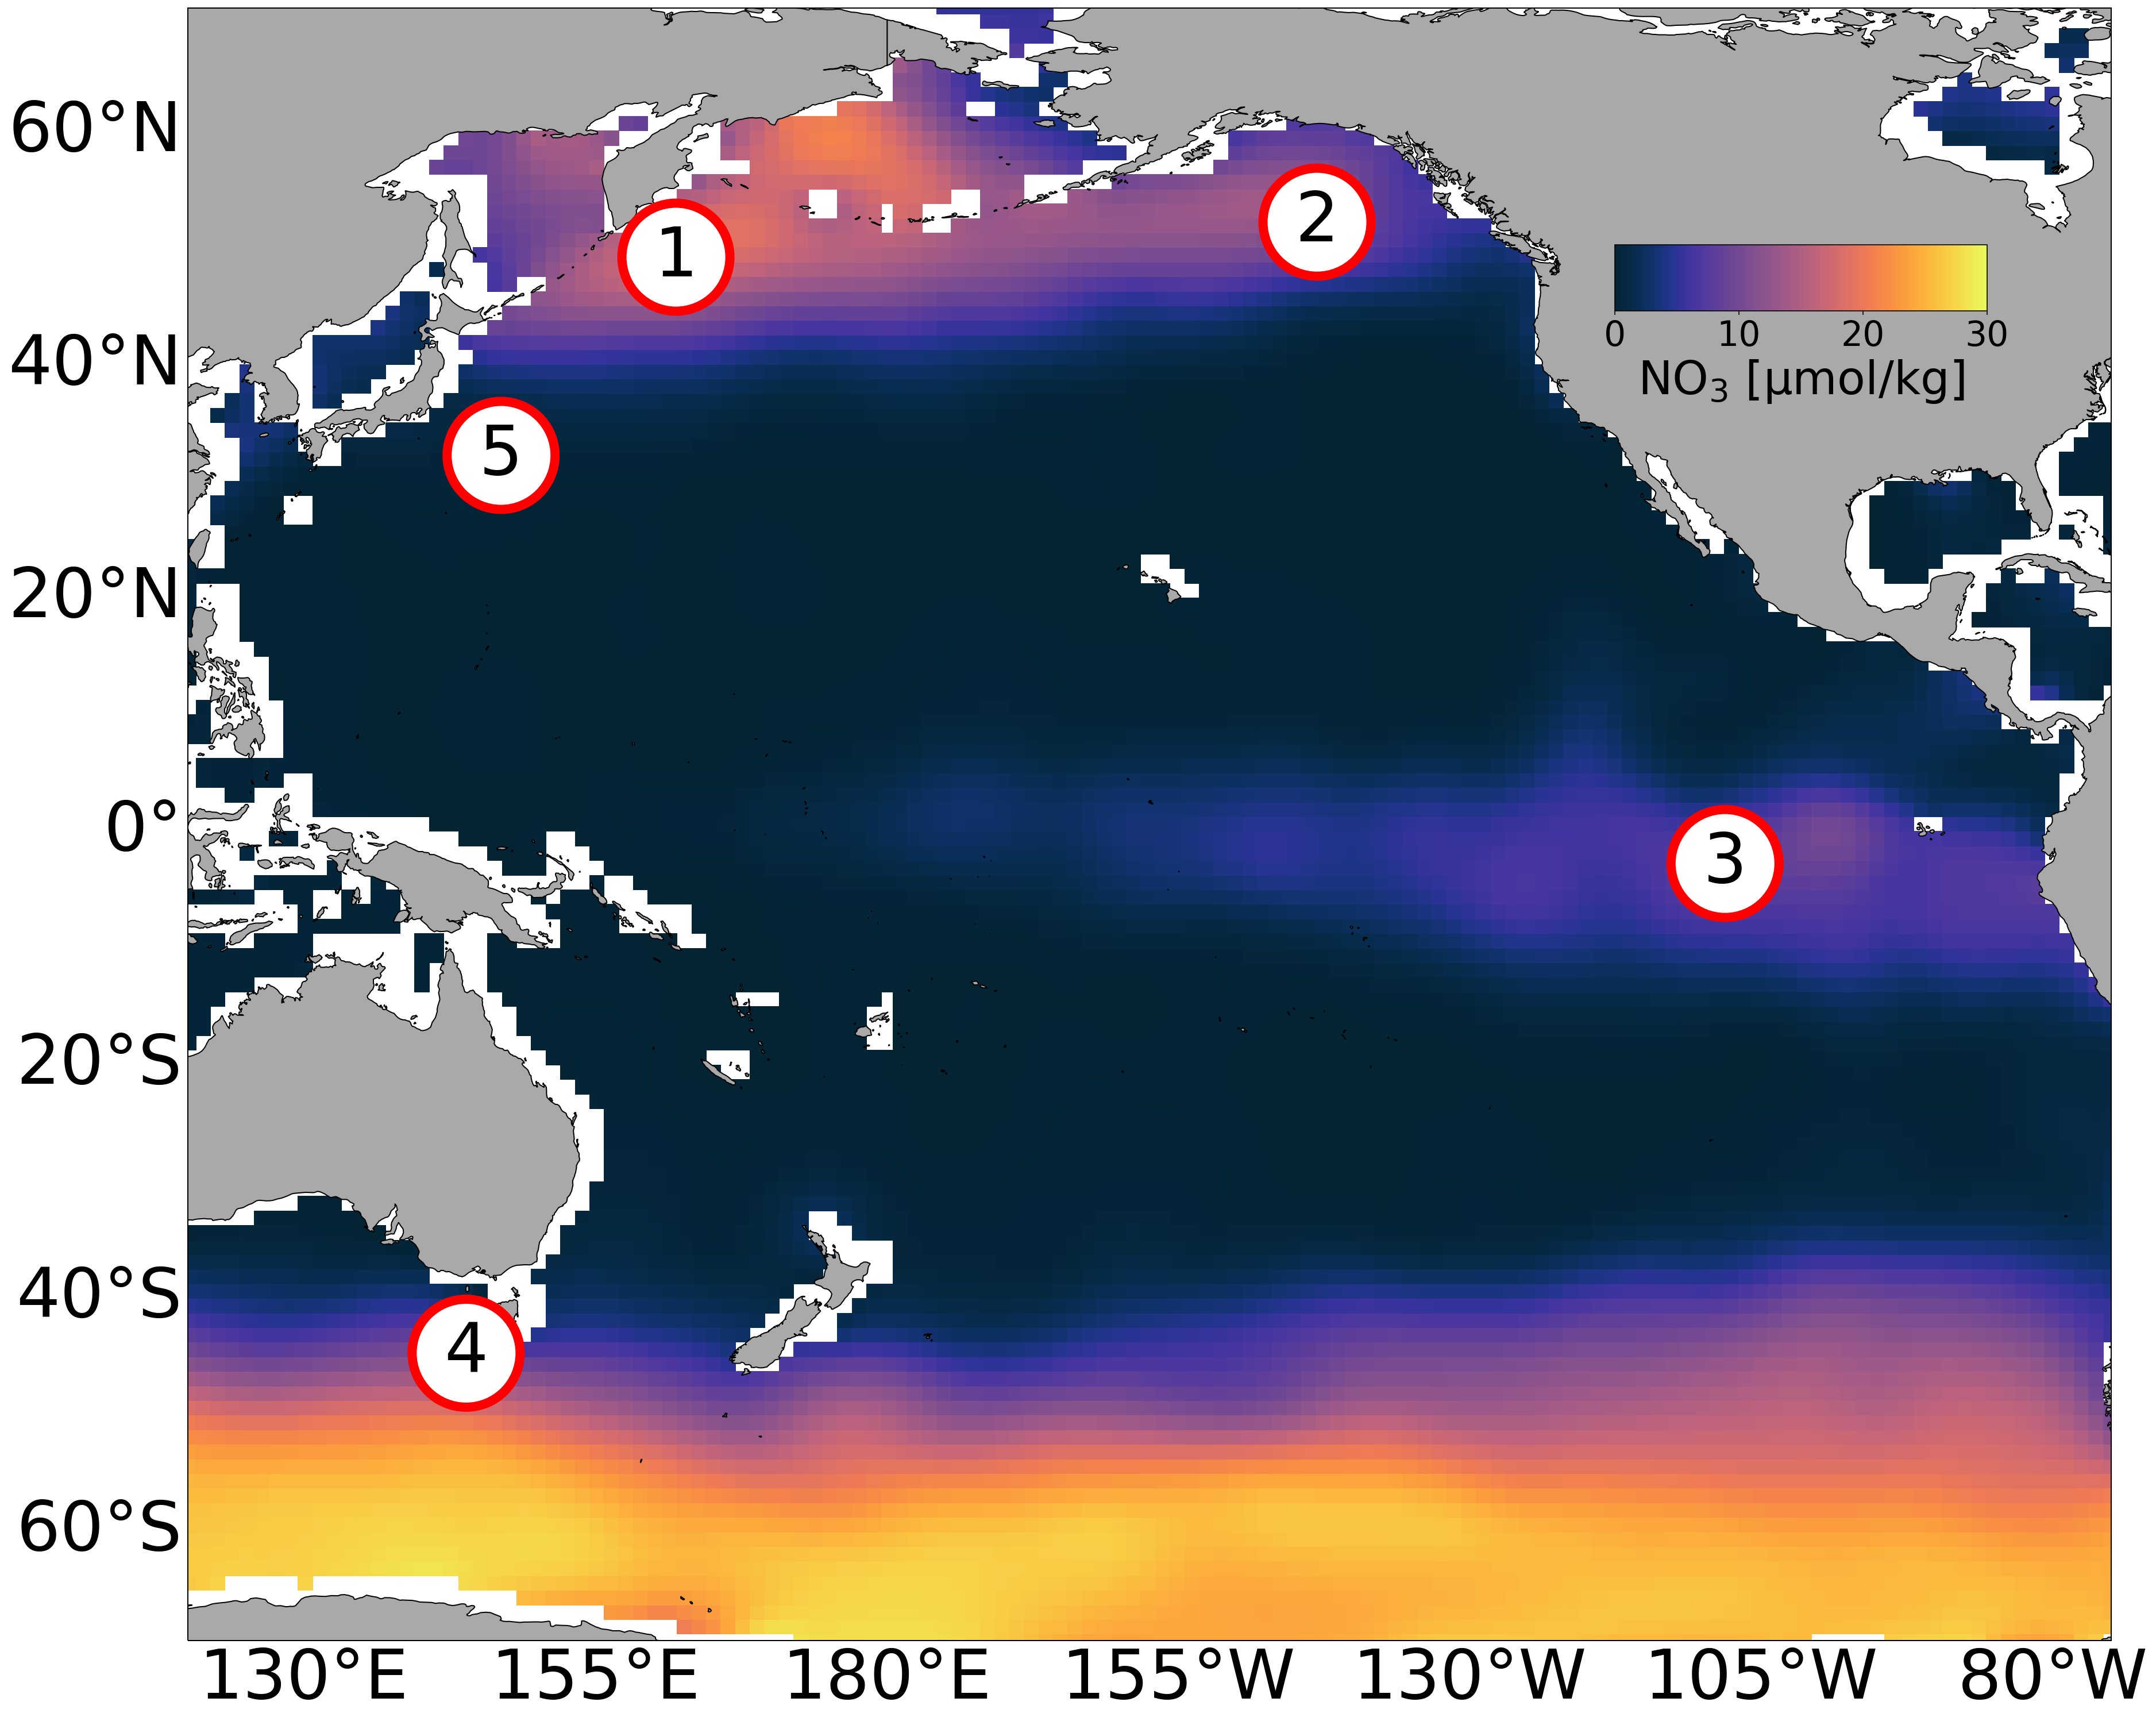

In [65]:


# proj = ccrs.PlateCarree(central_longitude=180)
# proj = ccrs.Robinson(central_longitude = 200)

grid_skip = 50 # this is the stride for subsetting the data
it0 = 29 # this is the "time of the observation"

# globe
# da = ds

# # Argentinian basin and Drake's Passage
# da = ds.sel(lon=slice(-70, -15)).sel(lat=slice(-65, -25)) # subset geographic region of interest
# da12 = ds12.sel(lon=slice(-70, -15)).sel(lat=slice(-65, -25)) # subset geographic region of interest

# Equatorial Atlantic
# da = ds.sel(lon=slice(-70, 10)).sel(lat=slice(-25, 25)) # subset geographic region of interest

# # North Atlantic
# da = ds.sel(lon=slice(-90, 20)).sel(lat=slice(-90, 90)) # subset geographic region of interest
# da12 = ds12.sel(lon=slice(-90, 20)).sel(lat=slice(-90, 90)) # subset geographic region of interest

woa2plotE = woa2plot.sel(lon=slice(100, 180)).sel(lat=slice(-90, 90))
woa2plotW = woa2plot.sel(lon=slice(-180, -75)).sel(lat=slice(-90, 90))

new_lon = np.linspace(woa2plot.lon[0], woa2plot.lon[-1], 144 * 2)
new_lat = np.linspace(woa2plot.lat[0], woa2plot.lat[-1], 72 *2)
woa2ploti = woa2plot.interp(lat=new_lat, lon=new_lon)
data, lon = add_cyclic_point(woa2ploti, coord=woa2ploti['lon'])
data, lon = add_cyclic_point(woa2ploti, coord=woa2ploti['lon'])



# North Pacific
# da = ds.sel(lon=slice(100, 260)).sel(lat=slice(-90, 90)) # subset geographic region of interest
da12 = ds12.sel(lon=slice(100, 180)).sel(lat=slice(-90, 90)) # subset geographic region of interest
da12b = ds12.sel(lon=slice(-180, -75)).sel(lat=slice(-90, 90)) # subset geographic region of interest


# da_bkw = da.sel(time=slice( da.time[0], da.time[it0]  )) # subset backward trajectories
# da_fwd = da.sel(time=slice( da.time[it0], da.time[-1]  )) # subset forward trajectories

da12_bkw = da12.sel(time=slice( da12.time[0], da12.time[it0]  )) # subset backward trajectories
da12_fwd = da12.sel(time=slice( da12.time[it0], da12.time[-1]  )) # subset forward trajectories

da12b_bkw = da12b.sel(time=slice( da12b.time[0], da12b.time[it0]  )) # subset backward trajectories
da12b_fwd = da12b.sel(time=slice( da12b.time[it0], da12b.time[-1]  )) # subset forward trajectories




fig = plt.figure(figsize=(30,80))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180) )

WOA = ax.pcolormesh(  lon, woa2ploti['lat'], data[0], transform=ccrs.PlateCarree(), \
                linewidths=4, vmin=0, vmax=30, cmap = cm.cm.thermal )


# add colorscale
cbaxes = fig.add_axes([0.7, 0.58, 0.15, 0.01]) 
cb = plt.colorbar(WOA, cax = cbaxes, orientation="horizontal", pad=0.03)  
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
cb.set_label("$NO_3$ [$\mu$mol/kg]", fontsize=40, color='k')
cb.ax.tick_params(labelsize=30)

# # plot rain
# CS = ax.contour(  lonprec, new_latp, dataprec, transform=ccrs.PlateCarree(), \
#                 linewidths=4, colors='w' )
# ax.clabel(CS, inline=True, fontsize=30, fmt='%.0f')



# for ilon in range(0, len(da_bkw.lon), grid_skip):
#     for ilat in range(0, len(da_bkw.lat), grid_skip):
#         # bwk trajs in black
#         ax.plot(da_bkw['trajlon'][:,ilat,ilon], da_bkw['trajlat'][:,ilat,ilon], 5 , color='k', linestyle='-', transform=ccrs.PlateCarree() )
#         # fwd trajs in blue
#         ax.plot(da_fwd['trajlon'][:,ilat,ilon], da_fwd['trajlat'][:,ilat,ilon], 5 , color='b', linestyle='-', transform=ccrs.PlateCarree() )
# ax.scatter(da['trajlon'][it0, ::grid_skip, ::grid_skip], da['trajlat'][it0, ::grid_skip, ::grid_skip], 40 ,'r', marker='o', transform=ccrs.PlateCarree(), zorder=60 )



# for ilon in range(0, len(da12_bkw.lon), grid_skip):
#     for ilat in range(0, len(da12_bkw.lat), grid_skip):
#         # bwk trajs in black
# #         ax.plot(da12_bkw['trajlon'][:,ilat,ilon], da12_bkw['trajlat'][:,ilat,ilon], 5 , color='b', linestyle='-', transform=ccrs.PlateCarree() )
#         # fwd trajs in blue
#         ax.scatter(da12_fwd['trajlon'][:,ilat,ilon], da12_fwd['trajlat'][:,ilat,ilon], 5 , color='w', marker='.', transform=ccrs.PlateCarree() )
# ax.scatter(da12['trajlon'][-1, ::grid_skip, ::grid_skip], da12['trajlat'][-1, ::grid_skip, ::grid_skip], 100 ,'w', marker='o',  transform=ccrs.PlateCarree(), zorder=60 )

# for ilon in range(0, len(da12b_bkw.lon), grid_skip):
#     for ilat in range(0, len(da12b_bkw.lat), grid_skip):
#         # bwk trajs in black
# #         ax.plot(da12_bkw['trajlon'][:,ilat,ilon], da12_bkw['trajlat'][:,ilat,ilon], 5 , color='b', linestyle='-', transform=ccrs.PlateCarree() )
#         # fwd trajs in blue
#         ax.scatter(da12b_fwd['trajlon'][:,ilat,ilon], da12b_fwd['trajlat'][:,ilat,ilon], 5 , color='w', marker='.', transform=ccrs.PlateCarree() )
# ax.scatter(da12b['trajlon'][-1, ::grid_skip, ::grid_skip], da12b['trajlat'][-1, ::grid_skip, ::grid_skip], 100 ,'w', marker='o',  transform=ccrs.PlateCarree(), zorder=60 )



ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='darkgray'))
ax.set_extent([120, 285, -70, 70], ccrs.PlateCarree())
# ax.set_extent([-70, 10, -25, 25], ccrs.PlateCarree())
# ax.set_extent([-70, 10, 25, 65], ccrs.PlateCarree())
# ax.gridlines(draw_labels=True)




# add deployment sites
OSP = (215, 50)
SOTS = (142, -47)
K2 = (160, 47)
S1 = (145, 30)
EqPac = (250, -5)

k = 200

# ax.scatter(K2[0], K2[1], 60*k ,'w', marker='o',  transform=ccrs.PlateCarree(), zorder=60 )
ax.text(K2[0], K2[1], "1", transform=ccrs.PlateCarree(),
         bbox={"boxstyle" : "circle", "facecolor":"w", "edgecolor":"r", "linewidth":8}, zorder=60, size=60 )

# ax.scatter(OSP[0], OSP[1], 60*k ,'w', marker='o', edgecolors='r', linewidths=10, transform=ccrs.PlateCarree(), zorder=60 )
ax.text(OSP[0], OSP[1], "2", transform=ccrs.PlateCarree(),
         bbox={"boxstyle" : "circle", "facecolor":"w", "edgecolor":"r", "linewidth":8}, zorder=60, size=60 )

# ax.scatter(EqPac[0], EqPac[1], 60*k ,'w', marker='o',  transform=ccrs.PlateCarree(), zorder=60 )
ax.text(EqPac[0], EqPac[1], "3", transform=ccrs.PlateCarree(),
         bbox={"boxstyle" : "circle", "facecolor":"w", "edgecolor":"r", "linewidth":8}, zorder=60, size=60 )

# ax.scatter(SOTS[0], SOTS[1], 60*k, 'w', marker='o',  transform=ccrs.PlateCarree(), zorder=60 )
ax.text(SOTS[0], SOTS[1], "4", transform=ccrs.PlateCarree(),
         bbox={"boxstyle" : "circle", "facecolor":"w", "edgecolor":"r", "linewidth":8}, zorder=60, size=60 )

# ax.scatter(S1[0], S1[1], 60*k ,'w', marker='o',  transform=ccrs.PlateCarree(), zorder=60 )
ax.text(S1[0], S1[1], "5", transform=ccrs.PlateCarree(),
         bbox={"boxstyle" : "circle", "facecolor":"w", "edgecolor":"r", "linewidth":8}, zorder=60, size=60 )




gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-80, -105, -130, -155, 180, 155, 130])
gl.ylocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'fontsize': 60, 'color': 'k'}
gl.xlabel_style = {'fontsize': 60, 'color': 'k'}



In [84]:
cb.ax.tick_params


(1, 288, 577)

In [9]:
ds12['lon'].values


array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75])